<a href="https://colab.research.google.com/github/simsekergun/DATA601/blob/main/Lecture16_Ethics_and_Others/DATA601_c_RelationalData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[The content of this notebook is taken from: Jake VanderPlas' Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/index.html)

__Utils__

- run the code given below without changing any part of it. The code is taken from Python Data Science Handbook.

In [ ]:
def make_df(cols, ind):
    """Quickly make a DataFrame"""
    data = {c: [str(c) + str(i) for i in ind]
            for c in cols}
    return pd.DataFrame(data, ind)


class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

__Agenda__

- Merge, Join, Concat DataFrames

- Introduction to SQL -- sqlite (if time allows)

__Concats__

- This is one of the most basic way of combining more than one dataframes

[pd.concat - Documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html)

In [ ]:
## import pandas library

import pandas as pd

In [ ]:
## We will use make_df function to create dataframe 

make_df('ABC', [1,2,3,4,5])

,A,B,C
1,A1,B1,C1
2,A2,B2,C2
3,A3,B3,C3
4,A4,B4,C4
5,A5,B5,C5


In [ ]:
## make a dataset and keep it as df1
df1 = make_df('AB', [1, 2])
## make a dataframe and keep it as df2
df2 = make_df('AB', [1, 2])

## now inside of display use pd.concat 
display('df1', 'df2', 'pd.concat([df1, df2])')

,A,B
1,A1,B1
2,A2,B2
,A,B
1,A1,B1
2,A2,B2
,A,B
1,A1,B1
2,A2,B2
1,A1,B1
2,A2,B2


In [ ]:
## selecting rows? loc/iloc?
concat_df = pd.concat([df1, df2])

concat_df.loc[2]

,A,B
2,A2,B2
2,A2,B2


In [ ]:
## note that we can change the axis we combine dataframes

df3 = make_df('AB', [0, 1])
df4 = make_df('AD', [0, 1])

## use display again together with axis keyword

display('df3', 'df4', "pd.concat([df3, df4], axis =1)")

df3
    A   B
0  A0  B0
1  A1  B1

df4
    A   D
0  A0  D0
1  A1  D1

pd.concat([df3, df4], axis =1)
    A   B   A   D
0  A0  B0  A0  D0
1  A1  B1  A1  D1

__Concat:join parameter__

[pd.concat - documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html)

In [ ]:
df5 = make_df('ABC', [1, 2])
df6 = make_df('BCD', [1, 2])

## note that the default of 'join' parameter is outer
display('df5', 'df6', "pd.concat([df5, df6])")

df5
    A   B   C
1  A1  B1  C1
2  A2  B2  C2

df6
    B   C   D
1  B1  C1  D1
2  B2  C2  D2

pd.concat([df5, df6])
     A   B   C    D
1   A1  B1  C1  NaN
2   A2  B2  C2  NaN
1  NaN  B1  C1   D1
2  NaN  B2  C2   D2

In [ ]:
## let's see what happens if we set join ='inner'

pd.concat([df5, df6], join = 'outer')

,A,B,C,D
1,A1,B1,C1,NaN
2,A2,B2,C2,NaN
1,NaN,B1,C1,D1
2,NaN,B2,C2,D2


__Merge and Join__

[pd.merge - documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#database-style-dataframe-or-named-series-joining-merging)

one-to_one

In [ ]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})
display('df1', 'df2')

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR
,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


Let's take a look at the relations for these tables

In [ ]:
## we can use pd.merge method to combine these dataframes


df3 = pd.merge(df1, df2)

Many-to-one

In [ ]:
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})
display('df3', 'df4', )

df3
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014

df4
         group supervisor
0   Accounting      Carly
1  Engineering      Guido
2           HR      Steve

- Let's discuss the relationship between tables here

In [ ]:
## Use again to combine df3 and df4

pd.merge(df3, df4)

,employee,group,hire_date,supervisor
0,Bob,Accounting,2008,Carly
1,Jake,Engineering,2012,Guido
2,Lisa,Engineering,2004,Guido
3,Sue,HR,2014,Steve


Many-to-Many

In [ ]:
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
                              'Engineering', 'Engineering', 'HR', 'HR'],
                    'skills': ['math', 'spreadsheets', 'coding', 'linux',
                               'spreadsheets', 'organization']})
display('df1', 'df5')

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR
,group,skills
0,Accounting,math
1,Accounting,spreadsheets
2,Engineering,coding
3,Engineering,linux
4,HR,spreadsheets


- Let's discuss the relationship between tables here.

In [ ]:
## Merge df1 and df5 and display the resulting table
pd.merge(df1, df5)

,employee,group,skills
0,Bob,Accounting,math
1,Bob,Accounting,spreadsheets
2,Jake,Engineering,coding
3,Jake,Engineering,linux
4,Lisa,Engineering,coding
5,Lisa,Engineering,linux
6,Sue,HR,spreadsheets
7,Sue,HR,organization


Left_on - Right_on

In [ ]:
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa'],
                    'salary': [70000, 80000, 120000,]})


display('df1', 'df3' )

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR
,name,salary
0,Bob,70000
1,Jake,80000
2,Lisa,120000


Now let's combine df1 and df3 based on employee and name keys respectively.

In [ ]:
## use pd.merge method with 'left_on', 'right_on' keywords -- we can also play with 'how' parameter here

pd.merge(df1, df3, left_on = 'employee', right_on  = 'name', how = 'outer')

,employee,group,name,salary
0,Bob,Accounting,Bob,70000.0
1,Jake,Engineering,Jake,80000.0
2,Lisa,Engineering,Lisa,120000.0
3,Sue,HR,NaN,NaN


Inner-Outer

In [ ]:


df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
                    'food': ['fish', 'beans', 'bread']},
                   columns=['name', 'food'])
df7 = pd.DataFrame({'name': ['Mary', 'Joseph'],
                    'drink': ['wine', 'beer']},
                   columns=['name', 'drink'])

display('df6', 'df7', "pd.merge(df6, df7, how = 'outer')")


df6
    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread

df7
     name drink
0    Mary  wine
1  Joseph  beer

pd.merge(df6, df7, how = 'outer')
     name   food drink
0   Peter   fish   NaN
1    Paul  beans   NaN
2    Mary  bread  wine
3  Joseph    NaN  beer

In [ ]:
display('df6', 'df7', "pd.merge(df6, df7, how='outer')")

df6
    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread

df7
     name drink
0    Mary  wine
1  Joseph  beer

pd.merge(df6, df7, how='outer')
     name   food drink
0   Peter   fish   NaN
1    Paul  beans   NaN
2    Mary  bread  wine
3  Joseph    NaN  beer

Left-Right

In [ ]:
display('df6', 'df7', "pd.merge(df6, df7, how='left')")

df6
    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread

df7
     name drink
0    Mary  wine
1  Joseph  beer

pd.merge(df6, df7, how='left')
    name   food drink
0  Peter   fish   NaN
1   Paul  beans   NaN
2   Mary  bread  wine

Overlapping Columns

In [ ]:

df8 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [1, 2, 3, 4]})
df9 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [3, 1, 4, 2]})
display('df8', 'df9')



,name,rank
0,Bob,1
1,Jake,2
2,Lisa,3
3,Sue,4
,name,rank
0,Bob,3
1,Jake,1
2,Lisa,4
3,Sue,2


Merge dataframes on 'name' use 'suffix' keywoord to distinguish names.

In [ ]:
## use _df8, _df9 suffixes

pd.merge(df8, df9, on = 'name', suffixes = ['_df8', '_df9'])

,name,rank_df8,rank_df9
0,Bob,1,3
1,Jake,2,1
2,Lisa,3,4
3,Sue,4,2


## Working with Flights Data

__Read files__

__flights__

In [ ]:
flights = pd.read_csv('https://raw.githubusercontent.com/simsekergun/DATA601/main/Project2/datasets/flights.csv')

We already worked with `flights` data a lot.

__Airlines__

In [ ]:
import pandas as pd
airlines = pd.read_csv('https://raw.githubusercontent.com/simsekergun/DATA601/main/Project2/datasets/airlines.csv')
airlines.head()

,carrier,name
0,9E,Endeavor Air Inc.
1,AA,American Airlines Inc.
2,AS,Alaska Airlines Inc.
3,B6,JetBlue Airways
4,DL,Delta Air Lines Inc.


Note that `airlines` dataframe has the airline names and their abbreviation.

__Airports__


In [ ]:
airports = pd.read_csv('https://raw.githubusercontent.com/simsekergun/DATA601/main/Project2/datasets/airports.csv')

In [ ]:
airports.head()

,faa,name,lat,lon,alt,tz,dst,tzone
0,04G,Lansdowne Airport,41.130472,-80.619583,1044,-5,A,America/New_York
1,06A,Moton Field Municipal Airport,32.460572,-85.680028,264,-6,A,America/Chicago
2,06C,Schaumburg Regional,41.989341,-88.101243,801,-6,A,America/Chicago
3,06N,Randall Airport,41.431912,-74.391561,523,-5,A,America/New_York
4,09J,Jekyll Island Airport,31.074472,-81.427778,11,-5,A,America/New_York


`airports` has the information (location, time-zone, name, etc.) of the airports.

__Planes__

In [ ]:
planes = pd.read_csv('https://raw.githubusercontent.com/simsekergun/DATA601/main/Project2/datasets/planes.csv')


In [ ]:
planes.head()

,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
0,N10156,2004.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,NaN,Turbo-fan
1,N102UW,1998.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
2,N103US,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
3,N104UW,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
4,N10575,2002.0,Fixed wing multi engine,EMBRAER,EMB-145LR,2,55,NaN,Turbo-fan


`planes` dataframe contains information about the planes and their tailnumbers. 



__Weather__

In [ ]:
weather = pd.read_csv('https://raw.githubusercontent.com/simsekergun/DATA601/main/Project2/datasets/weatherNYhourly.csv')

In [ ]:
weather.head()

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,1,39.02,26.06,59.37,270.0,10.35702,NaN,0.0,1012.0,10.0,2013-01-01T06:00:00Z
1,EWR,2013,1,1,2,39.02,26.96,61.63,250.0,8.05546,NaN,0.0,1012.3,10.0,2013-01-01T07:00:00Z
2,EWR,2013,1,1,3,39.02,28.04,64.43,240.0,11.50780,NaN,0.0,1012.5,10.0,2013-01-01T08:00:00Z
3,EWR,2013,1,1,4,39.92,28.04,62.21,250.0,12.65858,NaN,0.0,1012.2,10.0,2013-01-01T09:00:00Z
4,EWR,2013,1,1,5,39.02,28.04,64.43,260.0,12.65858,NaN,0.0,1011.9,10.0,2013-01-01T10:00:00Z


`weather` dataframe contains weather related data for each airport in NYC.

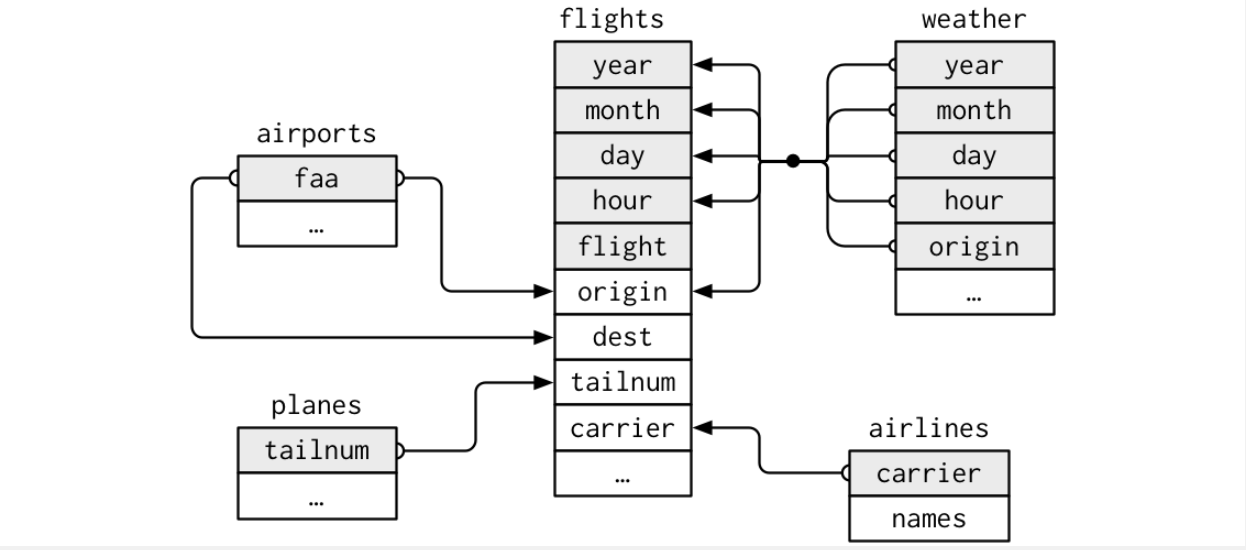

[Source: R for data science 13.2](https://r4ds.had.co.nz/relational-data.html)

__Recall__

A primary key uniquely identifies an observation in its own table.

__Recall__

A foreign key uniquely identifies an observation in another table. 

__Your Turn__

- What might be the __primary key__ of `planes` table.

- Is this 'key' a primary or foreign key for `flights` table?

__Answers__

|

# Merging Tables

In [ ]:
 ## Simplyfy the flights table to see the actions of the methods

 flights2 = flights[['year', 'month', 'day', 'hour', 'origin', 'dest', 'tailnum', 'carrier']].copy()

In [ ]:
flights2.head()

flights.shape

(145735, 17)

In [ ]:
airlines.head(2)

,carrier,name
0,9E,Endeavor Air Inc.
1,AA,American Airlines Inc.


__Merge `Airlines` information__

__Your Turn__

- Merge flights2 with airlines using 'carrier' keyword

In [ ]:
## Use merge method to combine airlines and flights

pd.merge(flights2, airlines)

flights2.merge(airlines, on = ['carrier'])

,year,month,day,hour,origin,dest,tailnum,carrier,name
0,2013,1,1,13.0,EWR,ALB,N13538,EV,ExpressJet Airlines Inc.
1,2013,1,1,16.0,EWR,ALB,N19554,EV,ExpressJet Airlines Inc.
2,2013,1,1,20.0,EWR,ALB,N12540,EV,ExpressJet Airlines Inc.
3,2013,1,2,13.0,EWR,ALB,N14153,EV,ExpressJet Airlines Inc.
4,2013,1,2,17.0,EWR,ALB,N14153,EV,ExpressJet Airlines Inc.
...,...,...,...,...,...,...,...,...,...
145730,2013,12,31,14.0,JFK,LAX,N622VA,VX,Virgin America
145731,2013,12,31,16.0,JFK,LAX,N630VA,VX,Virgin America
145732,2013,6,15,16.0,EWR,DTW,N913EV,OO,SkyWest Airlines Inc.
145733,2013,6,22,18.0,EWR,DTW,N427SW,OO,SkyWest Airlines Inc.


[Pandas Merge](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html#pandas.DataFrame.merge)

[Pandas Join](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html)

__Merging by using more than one key__

In [ ]:
display('flights2.head(2)', 'weather.head(2)')

flights2.head(2)
   year  month  day  hour origin dest tailnum carrier
0  2013      1    1  13.0    EWR  ALB  N13538      EV
1  2013      1    1  16.0    EWR  ALB  N19554      EV

weather.head(2)
  origin  year  month  day  hour   temp   dewp  humid  wind_dir  wind_speed  \
0    EWR  2013      1    1     1  39.02  26.06  59.37     270.0    10.35702   
1    EWR  2013      1    1     2  39.02  26.96  61.63     250.0     8.05546   

   wind_gust  precip  pressure  visib             time_hour  
0        NaN     0.0    1012.0   10.0  2013-01-01T06:00:00Z  
1        NaN     0.0    1012.3   10.0  2013-01-01T07:00:00Z

__Your Turn__

- This time combine flights2 and weather but note that here you should use multiple keys:  ['year', 'month', 'day', 'hour', 'origin']

In [ ]:
## Merge flights2 and weather on multiple keys

pd.merge(flights2, weather, on  = ['year', 'month', 'day', 'hour', 'origin'], how = 'left')

,year,month,day,hour,origin,dest,tailnum,carrier,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,2013,1,1,13.0,EWR,ALB,N13538,EV,39.20,28.40,69.67,330.0,16.11092,NaN,0.0,NaN,10.0,2013-01-01T18:00:00Z
1,2013,1,1,16.0,EWR,ALB,N19554,EV,37.04,19.94,49.62,300.0,13.80936,20.71404,0.0,1012.1,10.0,2013-01-01T21:00:00Z
2,2013,1,1,20.0,EWR,ALB,N12540,EV,32.00,15.08,49.19,310.0,14.96014,NaN,0.0,1015.2,10.0,2013-01-02T01:00:00Z
3,2013,1,2,13.0,EWR,ALB,N14153,EV,33.98,12.92,41.33,290.0,16.11092,25.31716,0.0,1017.3,10.0,2013-01-02T18:00:00Z
4,2013,1,2,17.0,EWR,ALB,N14153,EV,32.00,12.92,44.74,290.0,12.65858,18.41248,0.0,1019.7,10.0,2013-01-02T22:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145730,2013,12,31,20.0,JFK,LAX,N768JB,B6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145731,2013,12,31,21.0,JFK,LAX,N332AA,AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145732,2013,12,31,NaN,EWR,LAX,NaN,UA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145733,2013,12,31,NaN,EWR,LAX,NaN,UA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


__Merging with `flights` and `planes`__

In [ ]:
display('flights2.head(2)', 'planes.head(2)')

flights2.head(2)
   year  month  day  hour origin dest tailnum carrier
0  2013      1    1  13.0    EWR  ALB  N13538      EV
1  2013      1    1  16.0    EWR  ALB  N19554      EV

planes.head(2)
  tailnum    year                     type      manufacturer      model  \
0  N10156  2004.0  Fixed wing multi engine           EMBRAER  EMB-145XR   
1  N102UW  1998.0  Fixed wing multi engine  AIRBUS INDUSTRIE   A320-214   

   engines  seats  speed     engine  
0        2     55    NaN  Turbo-fan  
1        2    182    NaN  Turbo-fan

__Your Turn__

- Merge flights2 with planes using 'tailnum' but make sure that the resulting table columns named appropriately.

In [ ]:
## Your Answer Here

## Hint You might want to use suffix argument

flights2.merge(planes, on = 'tailnum', suffixes = ['_flights', '_planes'], how = 'left')

,year_flights,month,day,hour,origin,dest,tailnum,carrier,year_planes,type,manufacturer,model,engines,seats,speed,engine
0,2013,1,1,13.0,EWR,ALB,N13538,EV,2001.0,Fixed wing multi engine,EMBRAER,EMB-145LR,2.0,55.0,NaN,Turbo-fan
1,2013,1,1,16.0,EWR,ALB,N19554,EV,2002.0,Fixed wing multi engine,EMBRAER,EMB-145LR,2.0,55.0,NaN,Turbo-fan
2,2013,1,1,20.0,EWR,ALB,N12540,EV,2001.0,Fixed wing multi engine,EMBRAER,EMB-145LR,2.0,55.0,NaN,Turbo-fan
3,2013,1,2,13.0,EWR,ALB,N14153,EV,2003.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2.0,55.0,NaN,Turbo-fan
4,2013,1,2,17.0,EWR,ALB,N14153,EV,2003.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2.0,55.0,NaN,Turbo-fan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145730,2013,12,31,20.0,JFK,LAX,N768JB,B6,2009.0,Fixed wing multi engine,AIRBUS,A320-232,2.0,200.0,NaN,Turbo-fan
145731,2013,12,31,21.0,JFK,LAX,N332AA,AA,1987.0,Fixed wing multi engine,BOEING,767-223,2.0,255.0,NaN,Turbo-fan
145732,2013,12,31,NaN,EWR,LAX,NaN,UA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145733,2013,12,31,NaN,EWR,LAX,NaN,UA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


__Merging by using different 'keys' on each table__

In [ ]:
display('flights2.head(2)', 'airports.head(2)')

,year,month,day,hour,origin,dest,tailnum,carrier
0,2013,1,1,13.0,EWR,ALB,N13538,EV
1,2013,1,1,16.0,EWR,ALB,N19554,EV
,faa,name,lat,lon,alt,tz,dst,tzone
0,04G,Lansdowne Airport,41.130472,-80.619583,1044,-5,A,America/New_York
1,06A,Moton Field Municipal Airport,32.460572,-85.680028,264,-6,A,America/Chicago


__Your Turn__

- Merge flights2 and airports based on the destination airports in the flights dataframe and 'faa' codes.

In [ ]:
## your answer here

pd.merge(flights2, airports, left_on = 'dest', right_on = 'faa', how = 'left' )

,year,month,day,hour,origin,dest,tailnum,carrier,faa,name,lat,lon,alt,tz,dst,tzone
0,2013,1,1,13.0,EWR,ALB,N13538,EV,ALB,Albany Intl,42.748267,-73.801692,285.0,-5.0,A,America/New_York
1,2013,1,1,16.0,EWR,ALB,N19554,EV,ALB,Albany Intl,42.748267,-73.801692,285.0,-5.0,A,America/New_York
2,2013,1,1,20.0,EWR,ALB,N12540,EV,ALB,Albany Intl,42.748267,-73.801692,285.0,-5.0,A,America/New_York
3,2013,1,2,13.0,EWR,ALB,N14153,EV,ALB,Albany Intl,42.748267,-73.801692,285.0,-5.0,A,America/New_York
4,2013,1,2,17.0,EWR,ALB,N14153,EV,ALB,Albany Intl,42.748267,-73.801692,285.0,-5.0,A,America/New_York
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145730,2013,12,31,20.0,JFK,LAX,N768JB,B6,LAX,Los Angeles Intl,33.942536,-118.408075,126.0,-8.0,A,America/Los_Angeles
145731,2013,12,31,21.0,JFK,LAX,N332AA,AA,LAX,Los Angeles Intl,33.942536,-118.408075,126.0,-8.0,A,America/Los_Angeles
145732,2013,12,31,NaN,EWR,LAX,NaN,UA,LAX,Los Angeles Intl,33.942536,-118.408075,126.0,-8.0,A,America/Los_Angeles
145733,2013,12,31,NaN,EWR,LAX,NaN,UA,LAX,Los Angeles Intl,33.942536,-118.408075,126.0,-8.0,A,America/Los_Angeles


__Your Turn__

- Combine `flights2` table with `airports` by using 'origin' on the `flights2` and 'faa' on the `airports`

In [ ]:
# Your answer goes here

# Resources

[Stackoverflow Data](https://insights.stackoverflow.com/survey)

[Pandas: Concat, Merge, Join](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html)

[Pandas Apply Function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html)

[Kaggle: More on encodings](https://www.kaggle.com/learn/data-cleaning)

[Apply, Map and ApplyMap](https://towardsdatascience.com/introduction-to-pandas-apply-applymap-and-map-5d3e044e93ff)